In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


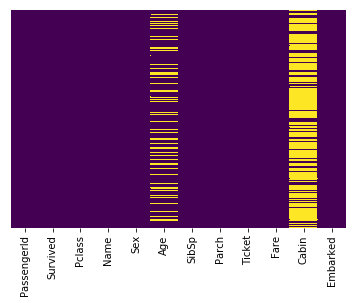

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
sns.set_style('whitegrid')

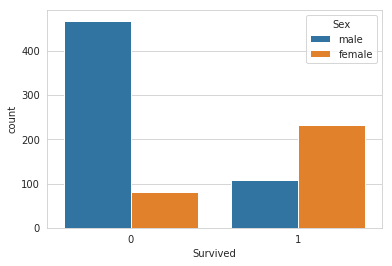

In [10]:
sns.countplot(x='Survived', hue='Sex', data=train)

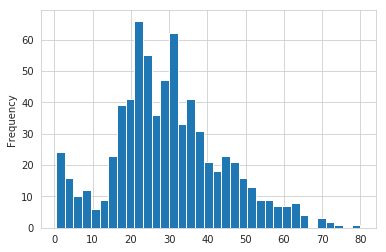

In [11]:
train['Age'].plot.hist(bins=35)

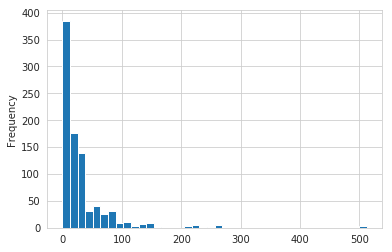

In [12]:
train['Fare'].plot.hist(bins=40)

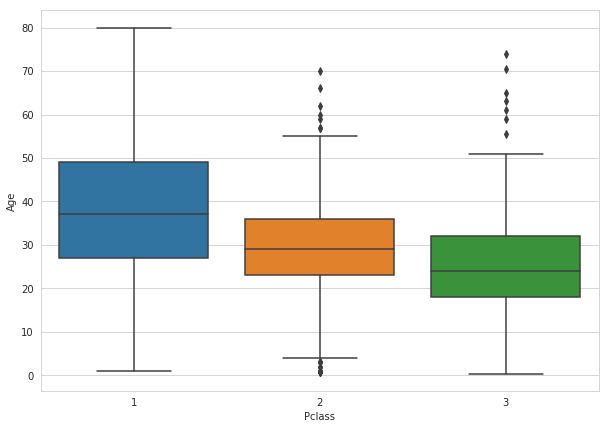

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

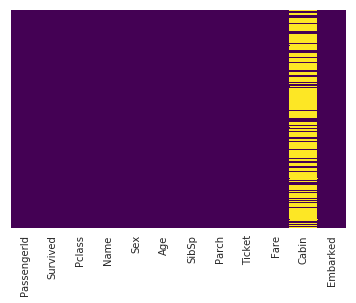

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
train.drop('Cabin', axis=1, inplace=True)

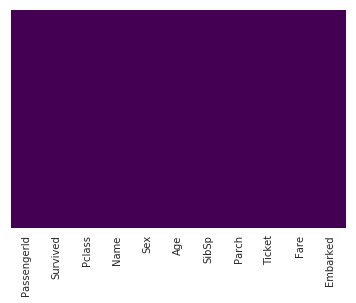

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
Sex_dic = {'male':1, 'female':0}
train['Sex'] = train['Sex'].replace(Sex_dic)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

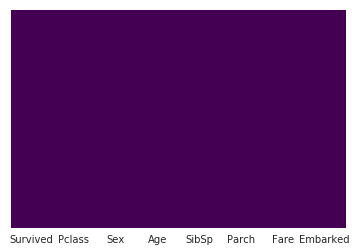

In [44]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [27]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
embk = {'C':0, 'Q':1, 'S':2}
train['Embarked'] = train['Embarked'].replace(embk)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2.0


In [31]:
train.drop(['Name', 'Ticket'],axis=1, inplace=True)

In [32]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [56]:
np.where(train.values >= np.finfo(np.float64).max)

/home/prathamesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


(array([], dtype=int64), array([], dtype=int64))

In [57]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X = X.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

/home/prathamesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/prathamesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logreg = LogisticRegression()

In [63]:
logreg.fit(X_train,y_train)

/home/prathamesh/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [54]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0
5,0,3,1,24.0,0,0,8.4583,1.0
6,0,1,1,54.0,0,0,51.8625,2.0
7,0,3,1,2.0,3,1,21.0750,2.0
8,1,3,0,27.0,0,2,11.1333,2.0
9,1,2,0,14.0,1,0,30.0708,0.0
